In [124]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
%matplotlib inline
import scipy.ndimage.filters as filters
from scipy.interpolate import interp1d
import cPickle as pickle

In [149]:
def smooth_plot(par_chain, plot_title, nbins=100, sigma=1, pdfout=None):
    vals, binedges = np.histogram(par_chain, bins=nbins, density=True)
    bins = binedges[:-1] + (binedges[1] - binedges[0]) / 2
    vals = filters.gaussian_filter(vals, sigma=sigma)
    f = interp1d(bins, vals, kind='cubic')

    pdf = f(bins)
    pdf = np.divide(pdf, np.sum(pdf))

    cdf = [np.sum(pdf[:i]) for i in range(len(pdf))]

    fig = plt.figure("pdf", figsize=(3, 4), dpi=100)

    a = plt.plot(bins, f(bins), 'b--', lw=3, zorder=2, label="Smoothed PDF")
    fig.axes[0].get_yaxis().set_visible(False)
    plt.xlabel("COSI")
    plt.title(plot_title)
    if pdfout is not None:
        pdfout.savefig()
        plt.close()

In [133]:
pulsar_dicts_m2, _ = pickle.load(open("/.lustre/aoc/students/sstetzle/long_simulations/dicts_M2_SINI/pars_M2_SINI_pulsar_chain_dict.pkl", "rb"))
pulsar_dicts_stig, _ = pickle.load(open("/.lustre/aoc/students/sstetzle/long_simulations/dicts/pars_H3_STIG_pulsar_chain_dict.pkl", "rb"))

def get_chains(PSR, burn=0.25, thin=10):    
    try:
        with open("thinned_chains/pars_H3_H4/{}/chain_burn_{}_thin_{}.txt".format(PSR, burn, thin), "r") as infile:
            data = np.loadtxt(infile)
            key_h3_h4 = 'H3 H4'
            cosi_h3_h4 = data[:, 2]
    except:
        key_h3_h4 = 'H3 H4 (missing)'
        cosi_h3_h4 = []

    try:
        with open("thinned_chains/pars_M2_SINI/{}/chain_burn_{}_thin_{}.txt".format(PSR, burn, thin), "r") as infile:
            data = np.loadtxt(infile)
            key_m2_sini = 'M2 SINI'
            cosi_m2_sini = data[:, 2]
    except:
        if PSR in pulsar_dicts_m2.keys():
            _, _, m2_par_dict = pulsar_dicts_m2[PSR]
            key_m2_sini = 'M2 SINI (old)'
            cosi_m2_sini = m2_par_dict['COSI']
        else:
            key_m2_sini = 'M2 SINI (missing)'
            cosi_m2_sini = []
            
    try:
        with open("thinned_chains/pars_H3_STIG/{}/chain_burn_{}_thin_{}.txt".format(PSR, burn, thin), "r") as infile:
            data = np.loadtxt(infile)
            key_h3_stig = 'H3 STIG'
            cosi_h3_stig = data[:, 2]
    except:
        if PSR in pulsar_dicts_stig.keys():
            _, _, stig_par_dict = pulsar_dicts_stig[PSR]
            key_h3_stig = 'H3 STIG (old)'
            cosi_h3_stig = stig_par_dict['COSI']
        else:
            key_h3_stig = 'H3 STIG (missing)'
            cosi_h3_stig = []
    
    return {key_h3_h4:cosi_h3_h4, key_m2_sini:cosi_m2_sini, key_h3_stig:cosi_h3_stig}

In [134]:
get_chains('J1713+0747')

{'H3 H4 (missing)': [],
 'H3 STIG': array([ 0.31088376,  0.31076284,  0.31070475, ...,  0.33535742,
         0.33558578,  0.32231133]),
 'M2 SINI (old)': array([ 0.30953152,  0.28222511,  0.28576617, ...,  0.30806932,
         0.30809053,  0.3075774 ])}

In [142]:
all_pulsars = np.genfromtxt("all_pulsars.txt", dtype=str)
good_pulsars = np.genfromtxt("good_pulsars.txt", dtype=str)

In [143]:
all_chains_burn_25_thin_10 = [get_chains(pulsar, burn=0.25, thin=10) for pulsar in all_pulsars]
all_chains_burn_50_thin_10 = [get_chains(pulsar, burn=0.5, thin=10) for pulsar in all_pulsars]

In [148]:
good_chains_burn_25_thin_10 = [get_chains(pulsar, burn=0.25, thin=10) for pulsar in good_pulsars]
good_chains_burn_50_thin_10 = [get_chains(pulsar, burn=0.5, thin=10) for pulsar in good_pulsars]

In [144]:
with PdfPages('all_burn_{}_thin_{}_plots.pdf'.format(0.25, 10)) as pdf:
    for chain, pulsar in zip(all_chains_burn_25_thin_10, pulsars):
        for sim in chain.keys():
            smooth_plot(chain[sim], '{} {}'.format(pulsar, sim), pdfout=pdf)

In [151]:
with PdfPages('good_burn_{}_thin_{}_plots.pdf'.format(0.25, 10)) as pdf:
    for chain, pulsar in zip(good_chains_burn_25_thin_10, pulsars):
        for sim in chain.keys():
            smooth_plot(chain[sim], '{} {}'.format(pulsar, sim), pdfout=pdf)

In [150]:
with PdfPages('all_burn_{}_thin_{}_plots.pdf'.format(0.5, 10)) as pdf:
    for chain, pulsar in zip(all_chains_burn_50_thin_10, pulsars):
        for sim in chain.keys():
            smooth_plot(chain[sim], '{}'.format(pulsar), pdfout=pdf)

In [152]:
with PdfPages('good_burn_{}_thin_{}_plots.pdf'.format(0.5, 10)) as pdf:
    for chain, pulsar in zip(chains_burn_50_thin_10, pulsars):
        for sim in chain.keys():
            smooth_plot(chain[sim], '{}'.format(pulsar, sim), pdfout=pdf)

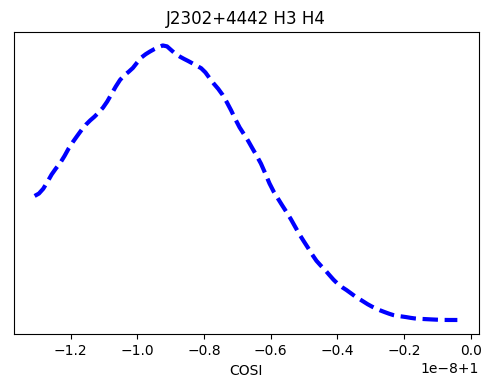

In [105]:
smooth_plot(chains[0]['H3 H4'], '{} H3 H4'.format(pulsar))

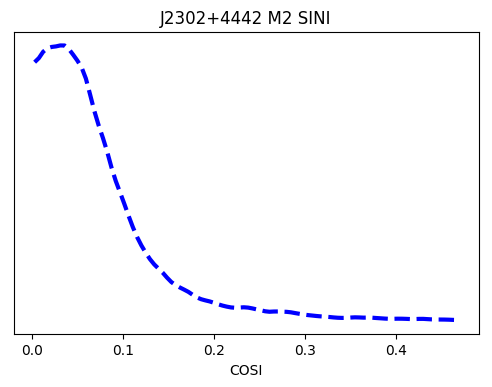

In [106]:
smooth_plot(chains[0]['M2 SINI'], '{} M2 SINI'.format(pulsar))

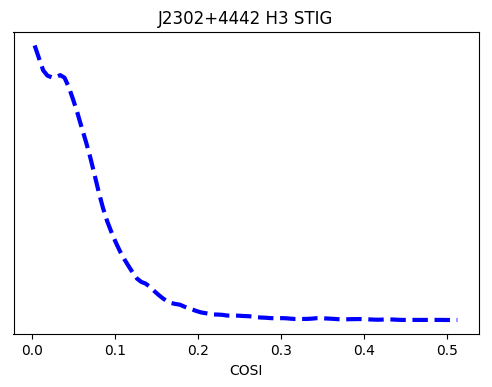

In [107]:
smooth_plot(chains[0]['H3 STIG'], '{} H3 STIG'.format(pulsar))

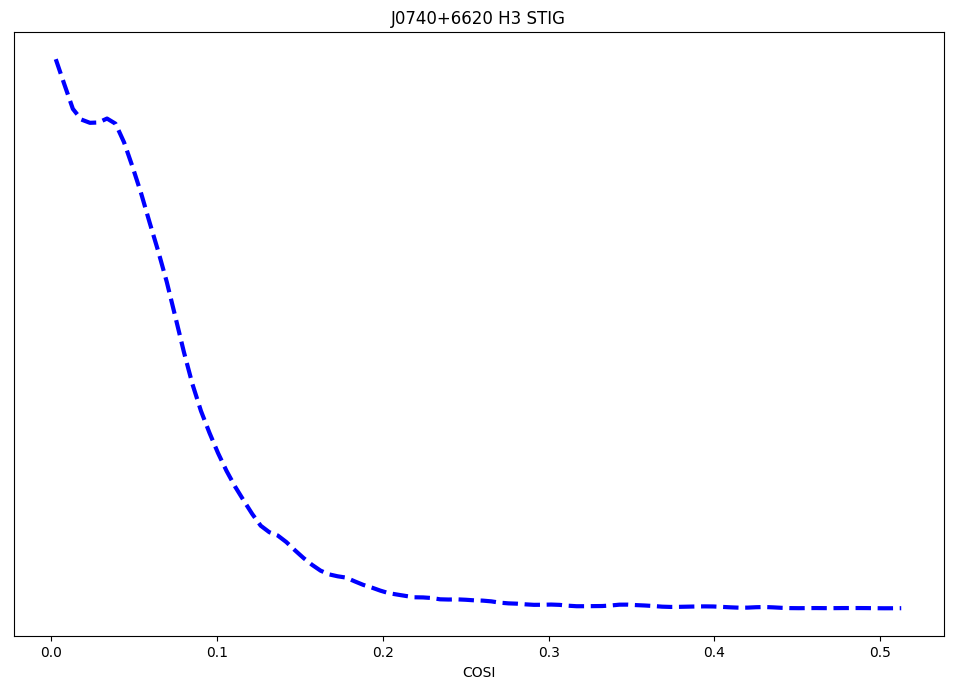

In [94]:
smooth_plot(chains[1]['H3 H4'], '{} H3 H4'.format(pulsar))

In [95]:
smooth_plot(chain[1]['M2 SINI'], '{} M2 SINI'.format(pulsar))

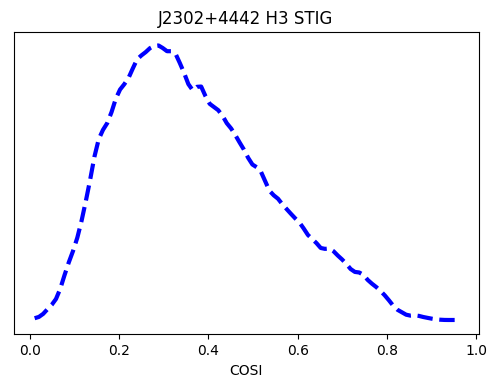

In [117]:
smooth_plot(chains[1]['H3 STIG'], '{} H3 STIG'.format(pulsar))

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

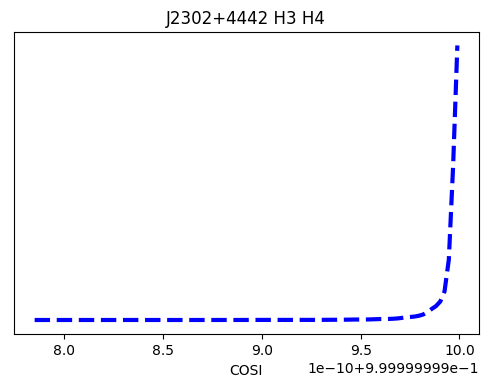

In [111]:
smooth_plot(chains[2]['H3 H4'], '{} H3 H4'.format(pulsar))

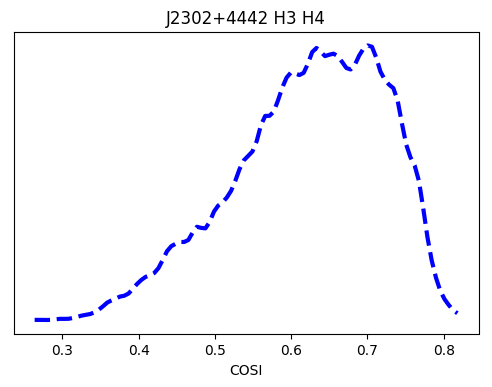

In [115]:
smooth_plot(chains[2]['M2 SINI'], '{} H3 H4'.format(pulsar))

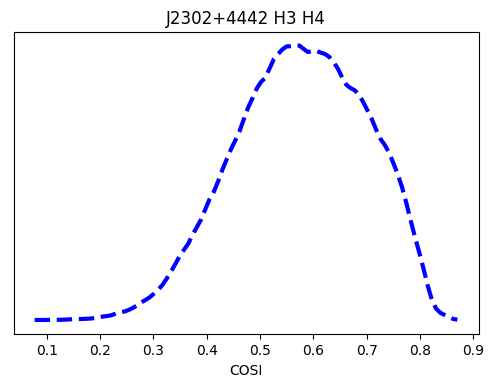

In [119]:
smooth_plot(chains[2]['H3 STIG'], '{} H3 H4'.format(pulsar))